## Paper Reading Analysis - Code Implementation
### Differences in SSIM From the Randomized Layer Weights
### Jonathan Alcineus

In [1]:
# These handle the file locations and importing the dataframe from the saved datafile from the authors files
import os
import pandas as pd


# These handle the image processing, editing, or displaying that needs to be performed
import cv2 
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import skimage

# These handle training the convolutional neural network (CNN) model
import tensorflow as tf
import keras
import numpy as np
import sklearn
from keras.applications.inception_v3 import InceptionV3
from keras.layers import Dense, BatchNormalization, MaxPooling2D, GlobalAveragePooling2D, Dropout
from keras.models import Model, load_model
from keras.optimizers import Adam, SGD

import copy

2025-09-02 03:11:00.934292: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-02 03:11:03.232307: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1756782663.867621    3343 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1756782664.078030    3343 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1756782665.176218    3343 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [2]:

# This changes the home directory
home_directory = os.path.expanduser("~")
os.chdir(home_directory)

# Then goes to the folder where the data lies
os.chdir('DNNorDermatologist')

# Ensures that we are in the correct folder
print(os.getcwd())

# Open the dataframe for the photos that are in the zip file
loaded_df = pd.read_pickle('NvAndMelNoDuplicatesFullSize.zip')


/teamspace/studios/this_studio/DNNorDermatologist


In [19]:
import glob
from skimage.metrics import structural_similarity as ssim
path_dict = {}

In [20]:
print(os.listdir('.'))

['Explanations_TEST_Scramble_1', 'Explanations_TEST_Scramble_2', 'Explanations_TEST_Scramble_3', 'Explanations_TEST_Scramble_4', 'Explanations_TEST_Scramble_5', '__pycache__', 'gradcam_shap.py', 'model_10_training.ipynb', 'model_11_training.ipynb', 'model_12_training.ipynb', 'model_13_training.ipynb', 'model_14_training.ipynb', 'model_15_training.ipynb', 'model_2_training.ipynb', 'model_3_training.ipynb', 'model_4_training.ipynb', 'model_5_training.ipynb', 'model_6_training.ipynb', 'model_7_training.ipynb', 'model_8_training.ipynb', 'model_9_training.ipynb', 'paper-reading-prog-Alcineus.ipynb', 'predictions_model_0.csv', 'predictions_model_1.csv', 'predictions_model_10.csv', 'predictions_model_11.csv', 'predictions_model_12.csv', 'predictions_model_13.csv', 'predictions_model_14.csv', 'predictions_model_2.csv', 'predictions_model_3.csv', 'predictions_model_4.csv', 'predictions_model_5.csv', 'predictions_model_6.csv', 'predictions_model_7.csv', 'predictions_model_8.csv', 'predictions_mo

In [21]:
for i in range(1,6):
    path_dict[i] = glob.glob('Explanations_TEST_Scramble_{}/*.png'.format(i),recursive=True)

In [22]:
path_frame = pd.DataFrame.from_dict(path_dict)
path_frame

,1,2,3,4,5
0,Explanations_TEST_Scramble_1/id_11_Grad.png,Explanations_TEST_Scramble_2/id_11_Grad.png,Explanations_TEST_Scramble_3/id_11_Grad.png,Explanations_TEST_Scramble_4/id_11_Grad.png,Explanations_TEST_Scramble_5/id_11_Grad.png
1,Explanations_TEST_Scramble_1/id_11_SHAP.png,Explanations_TEST_Scramble_2/id_11_SHAP.png,Explanations_TEST_Scramble_3/id_11_SHAP.png,Explanations_TEST_Scramble_4/id_11_SHAP.png,Explanations_TEST_Scramble_5/id_11_SHAP.png
2,Explanations_TEST_Scramble_1/id_13_Grad.png,Explanations_TEST_Scramble_2/id_13_Grad.png,Explanations_TEST_Scramble_3/id_13_Grad.png,Explanations_TEST_Scramble_4/id_13_Grad.png,Explanations_TEST_Scramble_5/id_13_Grad.png
3,Explanations_TEST_Scramble_1/id_13_SHAP.png,Explanations_TEST_Scramble_2/id_13_SHAP.png,Explanations_TEST_Scramble_3/id_13_SHAP.png,Explanations_TEST_Scramble_4/id_13_SHAP.png,Explanations_TEST_Scramble_5/id_13_SHAP.png
4,Explanations_TEST_Scramble_1/id_21_Grad.png,Explanations_TEST_Scramble_2/id_21_Grad.png,Explanations_TEST_Scramble_3/id_21_Grad.png,Explanations_TEST_Scramble_4/id_21_Grad.png,Explanations_TEST_Scramble_5/id_21_Grad.png
5,Explanations_TEST_Scramble_1/id_21_SHAP.png,Explanations_TEST_Scramble_2/id_21_SHAP.png,Explanations_TEST_Scramble_3/id_21_SHAP.png,Explanations_TEST_Scramble_4/id_21_SHAP.png,Explanations_TEST_Scramble_5/id_21_SHAP.png
6,Explanations_TEST_Scramble_1/id_228_Grad.png,Explanations_TEST_Scramble_2/id_228_Grad.png,Explanations_TEST_Scramble_3/id_228_Grad.png,Explanations_TEST_Scramble_4/id_228_Grad.png,Explanations_TEST_Scramble_5/id_228_Grad.png
7,Explanations_TEST_Scramble_1/id_228_SHAP.png,Explanations_TEST_Scramble_2/id_228_SHAP.png,Explanations_TEST_Scramble_3/id_228_SHAP.png,Explanations_TEST_Scramble_4/id_228_SHAP.png,Explanations_TEST_Scramble_5/id_228_SHAP.png
8,Explanations_TEST_Scramble_1/id_231_Grad.png,Explanations_TEST_Scramble_2/id_231_Grad.png,Explanations_TEST_Scramble_3/id_231_Grad.png,Explanations_TEST_Scramble_4/id_231_Grad.png,Explanations_TEST_Scramble_5/id_231_Grad.png
9,Explanations_TEST_Scramble_1/id_231_SHAP.png,Explanations_TEST_Scramble_2/id_231_SHAP.png,Explanations_TEST_Scramble_3/id_231_SHAP.png,Explanations_TEST_Scramble_4/id_231_SHAP.png,Explanations_TEST_Scramble_5/id_231_SHAP.png


In [23]:
for i in path_dict.keys():
    image_list = []
    path_list = path_frame[i].tolist()
    for j in path_list:
        image_list.append(np.asarray(Image.open(j)))
    path_frame['Folder_{}_image'.format(i)] = image_list

In [24]:
for a in range(1,6):
    path_frame['SSIM_1_to_{}'.format(a)] = np.nan

In [26]:
ssim(path_frame['Folder_1_image'][0], path_frame['Folder_1_image'][0], win_size = 3)

np.float64(1.0)

In [34]:
for i in path_frame.index:
    for j in range(1,6):
        path_frame['SSIM_1_to_{}'.format(j)][i] = ssim(path_frame['Folder_1_image'][i], path_frame['Folder_{}_image'.format(j)][i],
                                                       win_size=3, multichannel = True, use_sample_covariance = True)

/tmp/ipykernel_3011/741004511.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  path_frame['SSIM_1_to_{}'.format(j)][i] = ssim(path_frame['Folder_1_image'][i], path_frame['Folder_{}_image'.format(j)][i],
/tmp/ipykernel_3011/741004511.py:3:

In [35]:
path_frame

,1,2,3,4,5,Folder_1_image,Folder_2_image,Folder_3_image,Folder_4_image,Folder_5_image,SSIM_1_to_1,SSIM_1_to_2,SSIM_1_to_3,SSIM_1_to_4,SSIM_1_to_5
0,Explanations_TEST_Scramble_1/id_11_Grad.png,Explanations_TEST_Scramble_2/id_11_Grad.png,Explanations_TEST_Scramble_3/id_11_Grad.png,Explanations_TEST_Scramble_4/id_11_Grad.png,Explanations_TEST_Scramble_5/id_11_Grad.png,"[[[178, 102, 120, 255], [178, 100, 116, 255], ...","[[[115, 102, 183, 255], [115, 100, 179, 255], ...","[[[115, 102, 183, 255], [115, 100, 179, 255], ...","[[[115, 102, 183, 255], [115, 100, 179, 255], ...","[[[115, 102, 183, 255], [115, 100, 179, 255], ...",1.0,0.308436,0.594349,0.430612,0.283406
1,Explanations_TEST_Scramble_1/id_11_SHAP.png,Explanations_TEST_Scramble_2/id_11_SHAP.png,Explanations_TEST_Scramble_3/id_11_SHAP.png,Explanations_TEST_Scramble_4/id_11_SHAP.png,Explanations_TEST_Scramble_5/id_11_SHAP.png,"[[[235, 214, 243, 255], [234, 211, 236, 255], ...","[[[235, 214, 243, 255], [234, 211, 236, 255], ...","[[[235, 214, 243, 255], [234, 211, 236, 255], ...","[[[235, 214, 243, 255], [234, 211, 236, 255], ...","[[[235, 214, 243, 255], [234, 211, 236, 255], ...",1.0,0.930807,0.935564,0.905755,0.913615
2,Explanations_TEST_Scramble_1/id_13_Grad.png,Explanations_TEST_Scramble_2/id_13_Grad.png,Explanations_TEST_Scramble_3/id_13_Grad.png,Explanations_TEST_Scramble_4/id_13_Grad.png,Explanations_TEST_Scramble_5/id_13_Grad.png,"[[[237, 114, 72, 255], [237, 114, 72, 255], [2...","[[[111, 76, 136, 255], [111, 75, 136, 255], [1...","[[[174, 76, 72, 255], [175, 75, 72, 255], [182...","[[[111, 76, 136, 255], [111, 75, 136, 255], [1...","[[[111, 187, 197, 255], [111, 187, 197, 255], ...",1.0,0.369937,0.659341,0.418753,0.261174
3,Explanations_TEST_Scramble_1/id_13_SHAP.png,Explanations_TEST_Scramble_2/id_13_SHAP.png,Explanations_TEST_Scramble_3/id_13_SHAP.png,Explanations_TEST_Scramble_4/id_13_SHAP.png,Explanations_TEST_Scramble_5/id_13_SHAP.png,"[[[227, 172, 167, 255], [227, 172, 167, 255], ...","[[[227, 172, 167, 255], [227, 172, 167, 255], ...","[[[227, 172, 167, 255], [227, 172, 167, 255], ...","[[[227, 172, 167, 255], [227, 172, 167, 255], ...","[[[227, 172, 167, 255], [227, 172, 167, 255], ...",1.0,0.932881,0.905608,0.865838,0.912364
4,Explanations_TEST_Scramble_1/id_21_Grad.png,Explanations_TEST_Scramble_2/id_21_Grad.png,Explanations_TEST_Scramble_3/id_21_Grad.png,Explanations_TEST_Scramble_4/id_21_Grad.png,Explanations_TEST_Scramble_5/id_21_Grad.png,"[[[139, 63, 74, 255], [139, 63, 74, 255], [141...","[[[76, 63, 175, 255], [76, 63, 175, 255], [76,...","[[[76, 63, 137, 255], [76, 63, 137, 255], [76,...","[[[139, 63, 74, 255], [139, 63, 74, 255], [139...","[[[76, 63, 137, 255], [76, 63, 137, 255], [76,...",1.0,0.172350,0.239011,0.286820,0.412971
5,Explanations_TEST_Scramble_1/id_21_SHAP.png,Explanations_TEST_Scramble_2/id_21_SHAP.png,Explanations_TEST_Scramble_3/id_21_SHAP.png,Explanations_TEST_Scramble_4/id_21_SHAP.png,Explanations_TEST_Scramble_5/id_21_SHAP.png,"[[[172, 152, 169, 255], [172, 152, 169, 255], ...","[[[172, 152, 169, 255], [172, 152, 169, 255], ...","[[[172, 152, 169, 255], [172, 152, 169, 255], ...","[[[172, 152, 169, 255], [172, 152, 169, 255], ...","[[[172, 152, 169, 255], [172, 152, 169, 255], ...",1.0,0.894367,0.893527,0.886270,0.873851
6,Explanations_TEST_Scramble_1/id_228_Grad.png,Explanations_TEST_Scramble_2/id_228_Grad.png,Explanations_TEST_Scramble_3/id_228_Grad.png,Explanations_TEST_Scramble_4/id_228_Grad.png,Explanations_TEST_Scramble_5/id_228_Grad.png,"[[[94, 192, 191, 255], [94, 192, 191, 255], [9...","[[[85, 174, 205, 255], [85, 174, 205, 255], [8...","[[[85, 66, 141, 255], [85, 66, 141, 255], [85,...","[[[85, 166, 205, 255], [85, 166, 205, 255], [8...","[[[85, 66, 141, 255], [85, 66, 141, 255], [85,...",1.0,0.445118,0.728523,0.428569,0.728523
7,Explanations_TEST_Scramble_1/id_228_SHAP.png,Explanations_TEST_Scramble_2/id_228_SHAP.png,Explanations_TEST_Scramble_3/id_228_SHAP.png,Explanations_TEST_Scramble_4/id_228_SHAP.png,Explanations_

In [57]:
# update dataframe with a column of the explanation type
path_frame['SHAP or GradCAM'] = [
    'Grad' if 'Grad.png' in path_frame[1][i] else 'Shap' for i in path_frame.index
]

# parse image id from the filename
path_frame['ID'] = [
    os.path.split(i)[1].split('_')[1] for i in path_frame[1]
]

# drop all unneeded columns
path_frame = path_frame.drop(list(range(1,6)) + ['Folder_{}_image'.format(i) for i in range(1,6)], axis=1)

In [58]:
path_frame.head()

,SSIM_1_to_1,SSIM_1_to_2,SSIM_1_to_3,SSIM_1_to_4,SSIM_1_to_5,SHAP or GradCAM,ID
0,1.0,0.308436,0.594349,0.430612,0.283406,Grad,11
1,1.0,0.930807,0.935564,0.905755,0.913615,Shap,11
2,1.0,0.369937,0.659341,0.418753,0.261174,Grad,13
3,1.0,0.932881,0.905608,0.865838,0.912364,Shap,13
4,1.0,0.172350,0.239011,0.286820,0.412971,Grad,21


In [59]:
df = path_frame
df_shap = df['SHAP or GradCAM'] == 'Shap'
df_shap = df[df_shap]
df_shap = df_shap.drop('SHAP or GradCAM', axis = 1)
df_shap

,SSIM_1_to_1,SSIM_1_to_2,SSIM_1_to_3,SSIM_1_to_4,SSIM_1_to_5,ID
1,1.0,0.930807,0.935564,0.905755,0.913615,11
3,1.0,0.932881,0.905608,0.865838,0.912364,13
5,1.0,0.894367,0.893527,0.886270,0.873851,21
7,1.0,0.885181,0.873092,0.855509,0.910315,228
9,1.0,0.876624,0.895318,0.875331,0.885446,231
11,1.0,0.885600,0.867769,0.866300,0.839704,2
13,1.0,0.917877,0.929458,0.886018,0.900125,57
15,1.0,0.908835,0.924125,0.878912,0.903831,5


In [60]:
df_grad = df['SHAP or GradCAM'] == 'Grad'
df_grad = df[df_grad]
df_grad = df_grad.drop('SHAP or GradCAM', axis = 1)
df_grad

,SSIM_1_to_1,SSIM_1_to_2,SSIM_1_to_3,SSIM_1_to_4,SSIM_1_to_5,ID
0,1.0,0.308436,0.594349,0.430612,0.283406,11
2,1.0,0.369937,0.659341,0.418753,0.261174,13
4,1.0,0.172350,0.239011,0.286820,0.412971,21
6,1.0,0.445118,0.728523,0.428569,0.728523,228
8,1.0,0.600883,0.668311,0.324190,0.622177,231
10,1.0,0.389429,0.680067,0.492729,0.237964,2
12,1.0,0.061341,0.341068,0.941925,0.661121,57
14,1.0,0.469602,0.970670,0.370155,0.414908,5


In [61]:
df_shap.to_csv('shap_random_layers.csv')

In [62]:
df_grad.to_csv('grad_random_layers.csv')

In [63]:
shap_describe = df_shap.describe()

In [64]:
grad_describe = df_grad.describe()

In [65]:
shap_describe.to_csv('shap_random_layers_stats.csv')

In [66]:
grad_describe.to_csv('grad_random_layers_stats.csv')

In [67]:
shap_describe

,SSIM_1_to_1,SSIM_1_to_2,SSIM_1_to_3,SSIM_1_to_4,SSIM_1_to_5
count,8.0,8.000000,8.000000,8.000000,8.000000
mean,1.0,0.904022,0.903057,0.877492,0.892406
std,0.0,0.021724,0.025349,0.015582,0.025437
min,1.0,0.876624,0.867769,0.855509,0.839704
25%,1.0,0.885495,0.888418,0.866185,0.882547
50%,1.0,0.901601,0.900463,0.877121,0.901978
75%,1.0,0.921110,0.925458,0.886081,0.910827
max,1.0,0.932881,0.935564,0.905755,0.913615


In [71]:
shap_dict = {}
shap_dict['SSIM'] = shap_describe.loc['mean']
shap_dict['Layers Scrambled'] = [0,1,2,3,4]

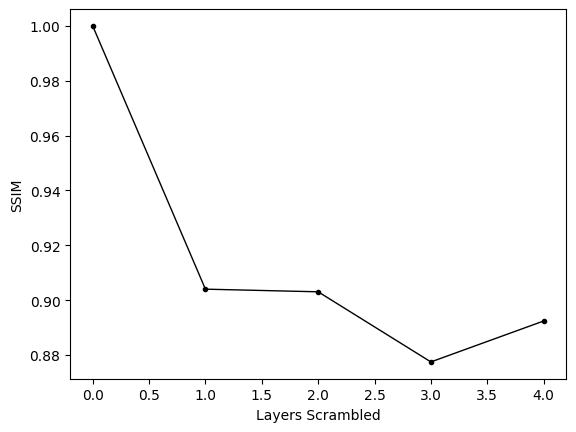

In [72]:
plt.xlabel('Layers Scrambled')
plt.ylabel('SSIM')
plt.title('')
plt.plot('Layers Scrambled', 'SSIM', data = shap_dict, color = 'black', lw = 1, marker = '.')

In [73]:
grad_describe

,SSIM_1_to_1,SSIM_1_to_2,SSIM_1_to_3,SSIM_1_to_4,SSIM_1_to_5
count,8.0,8.000000,8.000000,8.000000,8.000000
mean,1.0,0.352137,0.610167,0.461719,0.452781
std,0.0,0.171056,0.228372,0.204716,0.193723
min,1.0,0.061341,0.239011,0.286820,0.237964
25%,1.0,0.274415,0.531029,0.358664,0.277848
50%,1.0,0.379683,0.663826,0.423661,0.413939
75%,1.0,0.451239,0.692181,0.446141,0.631913
max,1.0,0.600883,0.970670,0.941925,0.728523


In [74]:
grad_dict = {}
grad_dict['SSIM'] = grad_describe.loc['mean']
grad_dict['Layers Scrambled'] = [0,1,2,3,4]

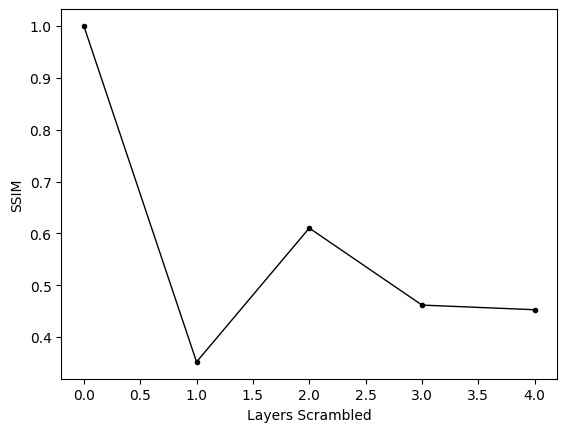

In [75]:
plt.xlabel('Layers Scrambled')
plt.ylabel('SSIM')
plt.title('')
plt.plot('Layers Scrambled', 'SSIM', data = grad_dict, color = 'black', lw = 1, marker = '.')

In [76]:
diff_shap = df.loc[df['SHAP or GradCAM'] == 'Shap']
diff_grad = df.loc[df['SHAP or GradCAM'] == 'Grad']

In [77]:
diff_shap['Diff_1_to_2'] = abs(diff_shap['SSIM_1_to_1'] - diff_shap['SSIM_1_to_2'])
diff_shap['Diff_2_to_3'] = abs(diff_shap['SSIM_1_to_2'] - diff_shap['SSIM_1_to_3'])
diff_shap['Diff_3_to_4'] = abs(diff_shap['SSIM_1_to_3'] - diff_shap['SSIM_1_to_4'])
diff_shap['Diff_4_to_5'] = abs(diff_shap['SSIM_1_to_4'] - diff_shap['SSIM_1_to_5'])

/tmp/ipykernel_3011/3029003745.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diff_shap['Diff_1_to_2'] = abs(diff_shap['SSIM_1_to_1'] - diff_shap['SSIM_1_to_2'])
/tmp/ipykernel_3011/3029003745.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diff_shap['Diff_2_to_3'] = abs(diff_shap['SSIM_1_to_2'] - diff_shap['SSIM_1_to_3'])
/tmp/ipykernel_3011/3029003745.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

In [78]:
diff_shap.head()

,SSIM_1_to_1,SSIM_1_to_2,SSIM_1_to_3,SSIM_1_to_4,SSIM_1_to_5,SHAP or GradCAM,ID,Diff_1_to_2,Diff_2_to_3,Diff_3_to_4,Diff_4_to_5
1,1.0,0.930807,0.935564,0.905755,0.913615,Shap,11,0.069193,0.004757,0.029809,0.007860
3,1.0,0.932881,0.905608,0.865838,0.912364,Shap,13,0.067119,0.027273,0.039769,0.046526
5,1.0,0.894367,0.893527,0.886270,0.873851,Shap,21,0.105633,0.000841,0.007256,0.012419
7,1.0,0.885181,0.873092,0.855509,0.910315,Shap,228,0.114819,0.012089,0.017583,0.054806
9,1.0,0.876624,0.895318,0.875331,0.885446,Shap,231,0.123376,0.018693,0.019987,0.010116


In [79]:
diff_grad['Diff_1_to_2'] = abs(diff_grad['SSIM_1_to_1'] - diff_grad['SSIM_1_to_2'])
diff_grad['Diff_2_to_3'] = abs(diff_grad['SSIM_1_to_2'] - diff_grad['SSIM_1_to_3'])
diff_grad['Diff_3_to_4'] = abs(diff_grad['SSIM_1_to_3'] - diff_grad['SSIM_1_to_4'])
diff_grad['Diff_4_to_5'] = abs(diff_grad['SSIM_1_to_4'] - diff_grad['SSIM_1_to_5'])

/tmp/ipykernel_3011/4237623072.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diff_grad['Diff_1_to_2'] = abs(diff_grad['SSIM_1_to_1'] - diff_grad['SSIM_1_to_2'])
/tmp/ipykernel_3011/4237623072.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diff_grad['Diff_2_to_3'] = abs(diff_grad['SSIM_1_to_2'] - diff_grad['SSIM_1_to_3'])
/tmp/ipykernel_3011/4237623072.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

In [80]:
diff_grad.describe().to_csv('random_layer_differences_grad.csv')
diff_grad.describe().to_csv('random_layer_differences_shap.csv')